In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("dataset/fifadata.csv")
data.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [84]:
from IPython.display import display

def describe(data: pd.core.frame.DataFrame):
    start = 0;
    end= start + 10;
    while end <= data.columns.size and start < data.columns.size:
        display(f"Data from {start+1} to {end}")
        data1 = data.iloc[:,start:end]
        display(data1.head())
        #display(data1.describe())
        display("======================================================================================================")
        start=end;
        end=start+10;
        if (end >= data.columns.size):
            end=data.columns.size


In [89]:
noFeatureColumns = ['Unnamed: 0','ID','Photo','Flag','Name','Club Logo','Real Face','Loaned From','Release Clause','Jersey Number']
dataWithPredictableFeature = data.drop(noFeatureColumns,axis=1)


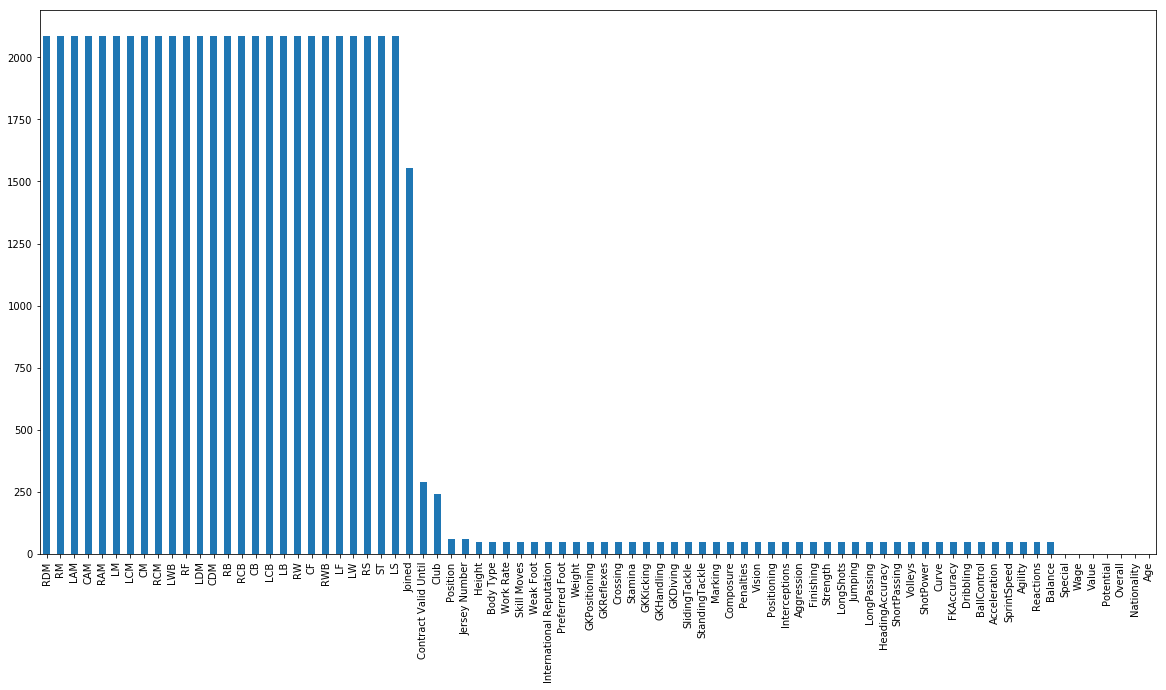

In [139]:
plt.figure(figsize=(20,10))
missing_data = dataWithPredictableFeature.isnull().sum().sort_values(ascending=False)
missing_data.plot.bar()

In [135]:
trash_data = dataWithPredictableFeature[dataWithPredictableFeature['RDM'].isnull()].index
dataWithoutMissingVal = dataWithPredictableFeature.drop(trash_data)

Int64Index([    3,     9,    18,    19,    22,    37,    40,    41,    46,
               57,
            ...
            18147, 18149, 18158, 18160, 18172, 18178, 18180, 18183, 18194,
            18198],
           dtype='int64', length=2085)

In [137]:
dataWithoutMissingVal = dataWithPredictableFeature.drop(trash_data)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000263BC6DB840> (for post_execute):


KeyboardInterrupt: 

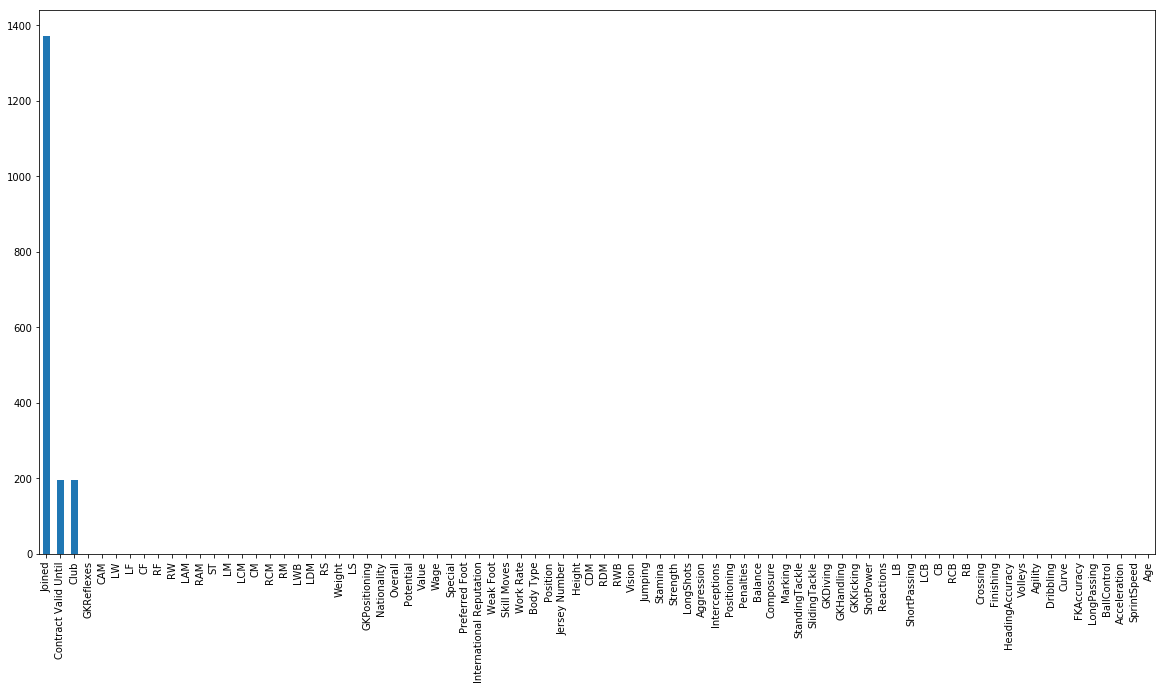

In [140]:
plt.figure(figsize=(20,10))
missing_data_1 = dataWithoutMissingVal.isnull().sum().sort_values(ascending=False)
missing_data_1.plot.bar()

In [179]:
dataWithoutMissingVal.reset_index(drop=True,inplace=True)
dataWithoutMissingVal

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
4,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
5,32,Croatia,91,91,Real Madrid,€67M,€420K,2280,Right,4.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
6,31,Uruguay,91,91,FC Barcelona,€80M,€455K,2346,Right,5.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
7,32,Spain,91,91,Real Madrid,€51M,€380K,2201,Right,4.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
8,29,Poland,90,90,FC Bayern München,€77M,€205K,2152,Right,4.0,...,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
9,28,Germany,90,90,Real Madrid,€76.5M,€355K,2190,Right,4.0,...,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0


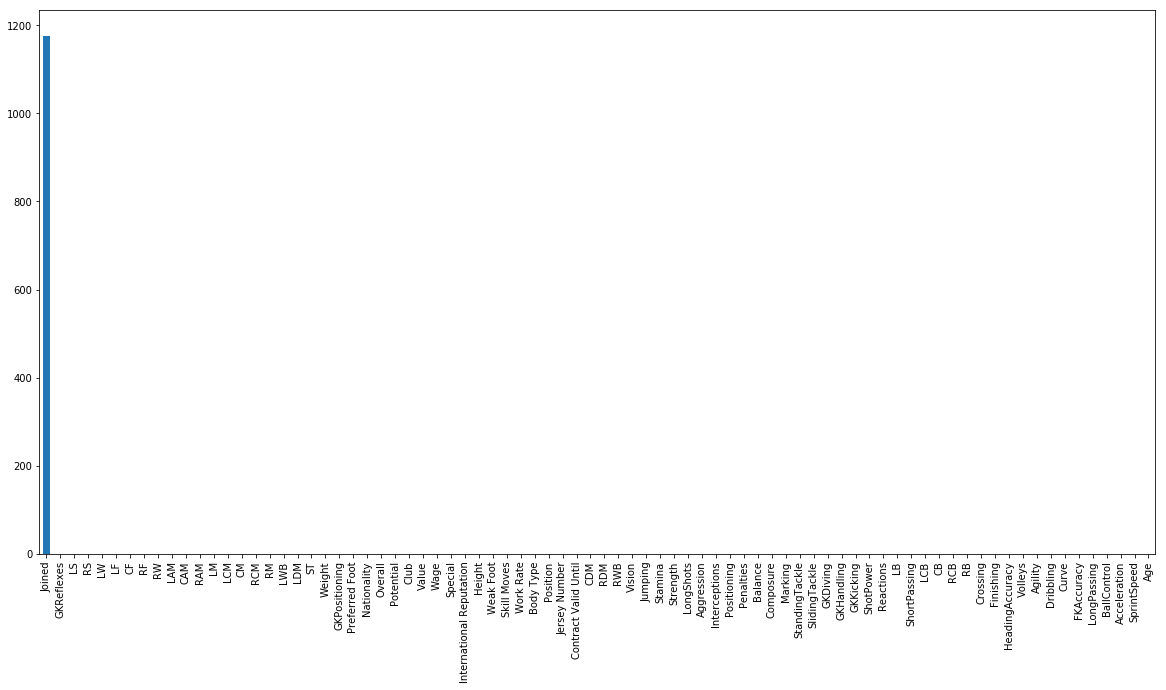

In [160]:
dataWithoutMissingVal = dataWithoutMissingVal.drop(dataWithoutMissingVal[dataWithoutMissingVal['Wage'] == '€0'].index)
dataWithoutMissingVal = dataWithoutMissingVal.drop(dataWithoutMissingVal[dataWithoutMissingVal['Value'] == '€0'].index)
plt.figure(figsize=(20,10))
missing_data_2 = dataWithoutMissingVal.isnull().sum().sort_values(ascending=False)
missing_data_2.plot.bar()

In [200]:
splited = dataWithoutMissingVal["Joined"].str.split(",", n = 1, expand = True)   
dataWithoutMissingVal['monthJoined'] = splited[0]
dataWithoutMissingVal['yearJoined'] = splited[1].astype('float')

In [222]:
yearJoined = (int) (dataWithoutMissingVal['yearJoined'].mean())
dataWithoutMissingVal['yearJoined']  = dataWithoutMissingVal['yearJoined'].fillna(yearJoined)
dataWithoutMissingVal = dataWithoutMissingVal.drop(['monthJoined','Joined'],axis=1)

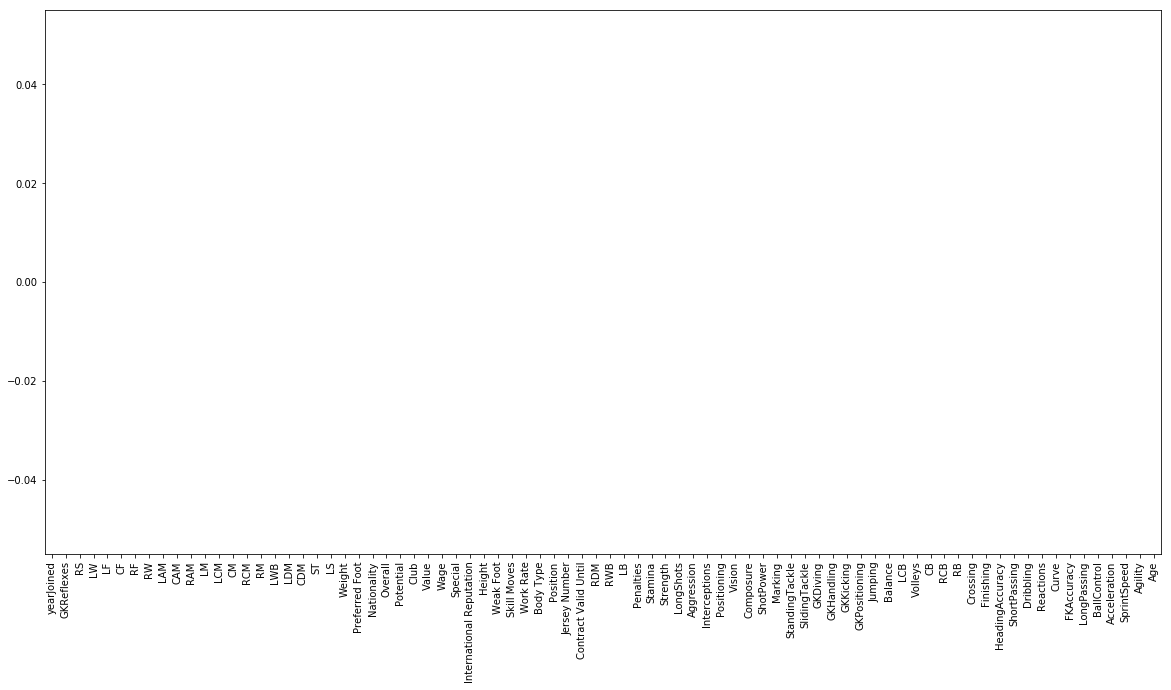

In [225]:
dataWithoutMissingVal = dataWithoutMissingVal.drop(dataWithoutMissingVal[dataWithoutMissingVal['Wage'] == '€0'].index)
plt.figure(figsize=(20,10))
missing_data_3 = dataWithoutMissingVal.isnull().sum().sort_values(ascending=False)
missing_data_3.plot.bar()

# Extract information from dataset
## Change height info from foot/inches to cm (convert from categorical to numeric)


In [230]:
#df = data
data_processing = dataWithoutMissingVal
data_processing['Height_Foot'], data_processing['Height_Inch'] = data_processing['Height'].str.split("'", 1).str
data_processing['Height_Foot'] = data_processing['Height_Foot'].astype('double')
data_processing['Height_Inch'] = data_processing['Height_Inch'].astype('double')
data_processing['Height_cm'] = (data_processing['Height_Foot'] * 12 + data_processing['Height_Inch']) * 2.54

In [234]:
data_processing = data_processing.drop(['Height','Height_Foot','Height_Inch'],axis=1)

In [237]:
data_processing['Weight']

0        159lbs
1        183lbs
2        150lbs
3        154lbs
4        163lbs
5        146lbs
6        190lbs
7        181lbs
8        176lbs
9        168lbs
10       172lbs
11       148lbs
12       159lbs
13       165lbs
14       196lbs
15       161lbs
16       168lbs
17       170lbs
18       154lbs
19       187lbs
20       161lbs
21       157lbs
22       185lbs
23       172lbs
24       130lbs
25       174lbs
26       168lbs
27       150lbs
28       176lbs
29       203lbs
          ...  
15896    148lbs
15897    132lbs
15898    161lbs
15899    154lbs
15900    148lbs
15901    163lbs
15902    163lbs
15903    134lbs
15904    165lbs
15905    179lbs
15906    159lbs
15907    174lbs
15908    161lbs
15909    148lbs
15910    165lbs
15911    176lbs
15912    168lbs
15913    165lbs
15914    146lbs
15915    141lbs
15916    146lbs
15917    141lbs
15918    150lbs
15919    157lbs
15920    168lbs
15921    134lbs
15922    170lbs
15923    148lbs
15924    154lbs
15925    176lbs
Name: Weight, Length: 15

In [15]:
describe(data)

'Data from 1 to 10'

,Age,Nationality,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot
0,31,Argentina,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left
1,33,Portugal,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right
2,26,Brazil,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right
3,27,Spain,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right
4,27,Belgium,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right


'======================================================================================================'

'Data from 11 to 20'

,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From
0,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN
1,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN
2,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN
3,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN
4,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN


'======================================================================================================'

'Data from 21 to 30'

,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF
0,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2
1,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3
2,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3
3,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3


'======================================================================================================'

'Data from 31 to 40'

,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB
0,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2
1,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3
2,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3


'======================================================================================================'

'Data from 41 to 50'

,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing
0,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0
1,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0
2,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
4,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0


'======================================================================================================'

'Data from 51 to 60'

,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration
0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0
1,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0
2,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0
3,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0
4,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0


'======================================================================================================'

'Data from 61 to 70'

,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression
0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0
1,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0
2,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0
3,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0
4,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0


'======================================================================================================'

'Data from 71 to 80'

,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling
0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0
1,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0
2,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0
3,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0
4,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0


'======================================================================================================'

'Data from 81 to 84'

,GKKicking,GKPositioning,GKReflexes,Release Clause
0,15.0,14.0,8.0,€226.5M
1,15.0,14.0,11.0,€127.1M
2,15.0,15.0,11.0,€228.1M
3,87.0,88.0,94.0,€138.6M
4,5.0,10.0,13.0,€196.4M


'======================================================================================================'

In [246]:
weight = data_processing['Weight'].str.extract(r'(\d+)')
data_processing['Weight_lbs'] = weight.astype('float')
data_processing = data_processing.drop(['Weight'],axis=1)

In [259]:
describe(data_processing)

'Data from 1 to 10'

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0
3,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0
4,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0


'======================================================================================================'

'Data from 11 to 20'

,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Contract Valid Until,LS,ST,RS
0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2021,88+2,88+2,88+2
1,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2022,91+3,91+3,91+3
2,5.0,5.0,High/ Medium,Neymar,LW,10.0,2022,84+3,84+3,84+3
3,5.0,4.0,High/ High,Normal,RCM,7.0,2023,82+3,82+3,82+3
4,4.0,4.0,High/ Medium,Normal,LF,10.0,2020,83+3,83+3,83+3


'======================================================================================================'

'Data from 21 to 30'

,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM
0,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2
1,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3
2,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3
3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3
4,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3


'======================================================================================================'

'Data from 31 to 40'

,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB
0,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2
1,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3
2,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3
3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3
4,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3


'======================================================================================================'

'Data from 41 to 50'

,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve
0,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0
1,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0
2,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0
3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0
4,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0


'======================================================================================================'

'Data from 51 to 60'

,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping
0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0
1,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0
2,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0
3,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0
4,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0


'======================================================================================================'

'Data from 61 to 70'

,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0
1,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0
2,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0
3,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0
4,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0


'======================================================================================================'

'Data from 71 to 80'

,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,yearJoined,Height_cm,Weight_lbs
0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2004.0,170.18,159
1,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2018.0,187.96,183
2,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2017.0,175.26,150
3,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2015.0,180.34,154
4,27.0,22.0,11.0,12.0,6.0,8.0,8.0,2012.0,172.72,163


'======================================================================================================'

In [262]:
def eval_data(data,columns):
    for colName in columns:
        col_Val = colName + "_val"
        data[col_Val] = data[colName].apply(lambda x: eval(x))
        

In [292]:
list_need_eval_columns = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM'
                     ,'CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB'
                     ,'CB','RCB','RB']
eval_data(data_processing,list_eval_columns)

Age
Nationality
Overall
Potential
Club
Value
Wage
Special
Preferred Foot
International Reputation
Weak Foot
Skill Moves
Work Rate
Body Type
Position
Jersey Number
Contract Valid Until
LS
ST
RS
LW
LF
CF
RF
RW
LAM
CAM
RAM
LM
LCM
CM
RCM
RM
LWB
LDM
CDM
RDM
RWB
LB
LCB
CB
RCB
RB
Crossing
Finishing
HeadingAccuracy
ShortPassing
Volleys
Dribbling
Curve
FKAccuracy
LongPassing
BallControl
Acceleration
SprintSpeed
Agility
Reactions
Balance
ShotPower
Jumping
Stamina
Strength
LongShots
Aggression
Interceptions
Positioning
Vision
Penalties
Composure
Marking
StandingTackle
SlidingTackle
GKDiving
GKHandling
GKKicking
GKPositioning
GKReflexes
yearJoined
Height_cm
Weight_lbs
LS_val
ST_val
RS_val
LW_val
LF_val
CF_val
RF_val
RW_val
LAM_val
CAM_val
RAM_val
LM_val
LCM_val
CM_val
RCM_val
RM_val
LWB_val
LDM_val
CDM_val
RDM_val
RWB_val
LB_val
LCB_val
CB_val
RCB_val
RB_val


In [296]:
list_after_eval = [data + "_val" for data in list_eval_columns]
data_processing = data_processing.drop(list_need_eval_columns,axis=1)

In [297]:
describe(data_processing)

'Data from 1 to 10'

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0
3,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0
4,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0


'======================================================================================================'

'Data from 11 to 20'

,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Contract Valid Until,Crossing,Finishing,HeadingAccuracy
0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2021,84.0,95.0,70.0
1,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2022,84.0,94.0,89.0
2,5.0,5.0,High/ Medium,Neymar,LW,10.0,2022,79.0,87.0,62.0
3,5.0,4.0,High/ High,Normal,RCM,7.0,2023,93.0,82.0,55.0
4,4.0,4.0,High/ Medium,Normal,LF,10.0,2020,81.0,84.0,61.0


'======================================================================================================'

'Data from 21 to 30'

,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility
0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0
1,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0
2,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0
3,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0
4,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0


'======================================================================================================'

'Data from 31 to 40'

,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning
0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0
1,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0
2,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0
3,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0
4,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0


'======================================================================================================'

'Data from 41 to 50'

,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0
1,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0
2,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0
3,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0
4,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0


'======================================================================================================'

'Data from 51 to 60'

,GKReflexes,yearJoined,Height_cm,Weight_lbs,LS_val,ST_val,RS_val,LW_val,LF_val,CF_val
0,8.0,2004.0,170.18,159,90,90,90,94,95,95
1,11.0,2018.0,187.96,183,94,94,94,92,93,93
2,11.0,2017.0,175.26,150,87,87,87,92,92,92
3,13.0,2015.0,180.34,154,85,85,85,90,90,90
4,8.0,2012.0,172.72,163,86,86,86,92,91,91


'======================================================================================================'

'Data from 61 to 70'

,RF_val,RW_val,LAM_val,CAM_val,RAM_val,LM_val,LCM_val,CM_val,RCM_val,RM_val
0,95,94,95,95,95,93,86,86,86,93
1,93,92,91,91,91,91,84,84,84,91
2,92,92,92,92,92,91,84,84,84,91
3,90,90,91,91,91,91,90,90,90,91
4,91,92,92,92,92,92,85,85,85,92


'======================================================================================================'

'Data from 71 to 80'

,LWB_val,LDM_val,CDM_val,RDM_val,RWB_val,LB_val,LCB_val,CB_val,RCB_val,RB_val
0,66,63,63,63,66,61,49,49,49,61
1,68,64,64,64,68,64,56,56,56,64
2,68,63,63,63,68,63,50,50,50,63
3,80,80,80,80,80,76,69,69,69,76
4,69,66,66,66,69,63,52,52,52,63


'======================================================================================================'

In [323]:
import re
def calculate_money(money):
    base = 1
    last = money[-1].casefold()
    if "m".casefold() == last:
        base = 1000000
    elif "k".casefold() == last:
        base = 1000
    
    if base > 1:
        val = (float) (money[1:-1])
    else:
        val = (float) (money[1:])
    return val*base

In [351]:
data_processing['Value_val'] = data_processing['Value'].apply(calculate_money)
data_processing['Wage_val'] = data_processing['Wage'].apply(calculate_money)
data_processing = data_processing.drop(['Value','Wage'],axis=1)

In [352]:
data_processing.head()

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,CDM_val,RDM_val,RWB_val,LB_val,LCB_val,CB_val,RCB_val,RB_val,Value_val,Wage_val
0,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,...,63,63,66,61,49,49,49,61,110500000.0,565000.0
1,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0,...,64,64,68,64,56,56,56,64,77000000.0,405000.0
2,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0,...,63,63,68,63,50,50,50,63,118500000.0,290000.0
3,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0,...,80,80,80,76,69,69,69,76,102000000.0,355000.0
4,27,Belgium,91,91,Chelsea,2142,Right,4.0,4.0,4.0,...,66,66,69,63,52,52,52,63,93000000.0,340000.0


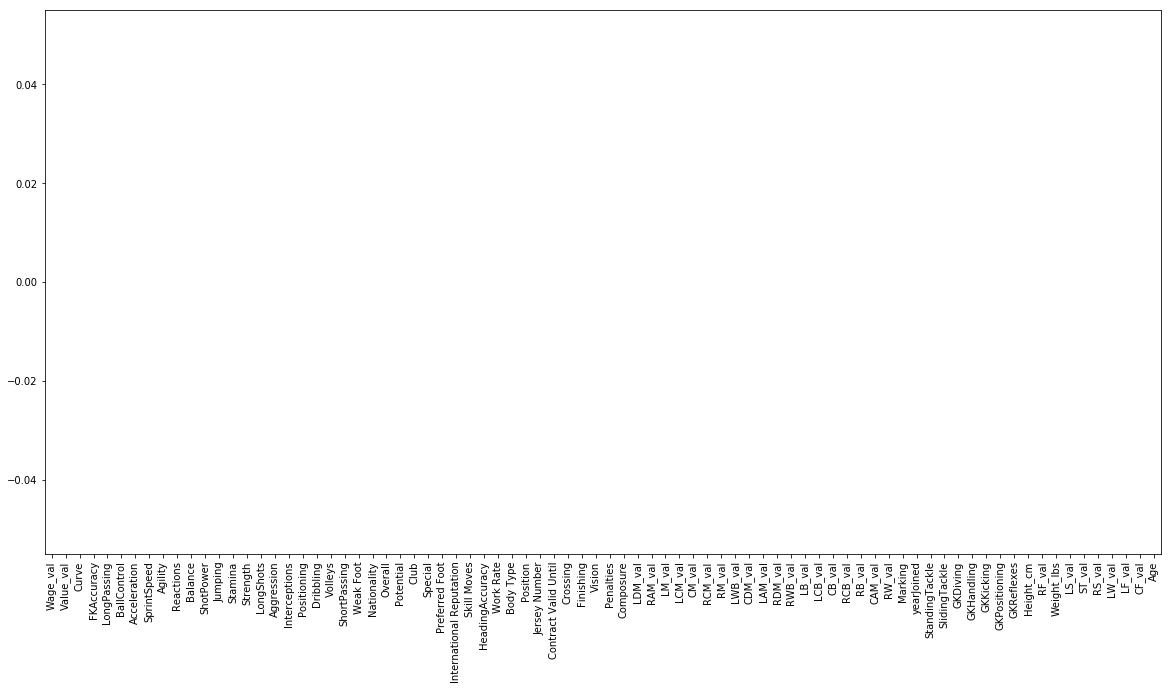

In [354]:
plt.figure(figsize=(20,10))
missing_data_4 = data_processing.isnull().sum().sort_values(ascending=False)
missing_data_4.plot.bar()

In [374]:
data_processing['Weight_lbs'] = data_processing['Weight_lbs'].astype('float')
data_processing['Contract Valid Until'] = data_processing['Contract Valid Until'].apply(lambda x: x[-4:])
data_processing['Contract Valid Until'] = data_processing['Contract Valid Until'].astype('float')

In [378]:
data_processing.select_dtypes("object")

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position
0,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,RF
1,Portugal,Juventus,Right,High/ Low,C. Ronaldo,ST
2,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,LW
3,Belgium,Manchester City,Right,High/ High,Normal,RCM
4,Belgium,Chelsea,Right,High/ Medium,Normal,LF
5,Croatia,Real Madrid,Right,High/ High,Lean,RCM
6,Uruguay,FC Barcelona,Right,High/ Medium,Normal,RS
7,Spain,Real Madrid,Right,High/ Medium,Normal,RCB
8,Poland,FC Bayern München,Right,High/ Medium,Normal,ST
9,Germany,Real Madrid,Right,Medium/ Medium,Normal,LCM


In [380]:
data_processing.head(5)

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,CDM_val,RDM_val,RWB_val,LB_val,LCB_val,CB_val,RCB_val,RB_val,Value_val,Wage_val
0,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,...,63,63,66,61,49,49,49,61,110500000.0,565000.0
1,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0,...,64,64,68,64,56,56,56,64,77000000.0,405000.0
2,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0,...,63,63,68,63,50,50,50,63,118500000.0,290000.0
3,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0,...,80,80,80,76,69,69,69,76,102000000.0,355000.0
4,27,Belgium,91,91,Chelsea,2142,Right,4.0,4.0,4.0,...,66,66,69,63,52,52,52,63,93000000.0,340000.0


# After cleaning data and transform into correct data form we want to perform encoding categorical before performing machine learning algorithm

In [386]:
data_processing = data_processing.drop(['Jersey Number'],axis=1)
df = pd.get_dummies(data_processing)
df.head(5)

KeyError: "['Jersey Number'] not found in axis"

# Data preprocessing is done. Now we can try to run some ML algorithm
## We first split our dataset into train and test

In [387]:
X = df.drop(['Value_val','Wage_val'],axis=1)
y = df['Value_val']

In [389]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [390]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\BaoHau\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [391]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [392]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 159342.97823357052
Mean Squared Error: 753296109368.4596
Root Mean Squared Error: 867926.3271548223


In [407]:
tree = 110
#tree_numbers,MAE,MSE,RMSE = [],[],[],[]
while tree <= 200:
    regressor = RandomForestRegressor(n_estimators=tree, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    tree_numbers.append(str(tree))
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    tree+=10

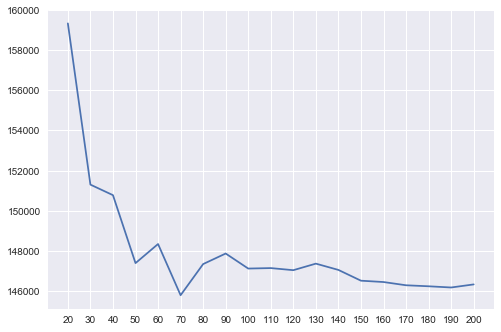

In [408]:
plt.style.use('seaborn')
plt.plot(tree_numbers, MAE, label = 'Mean absolute error')
#plt.plot(tree_numbers, MSE, label = 'Mean square error')
#plt.plot(tree_numbers, RMSE, label = 'Root mean square error')

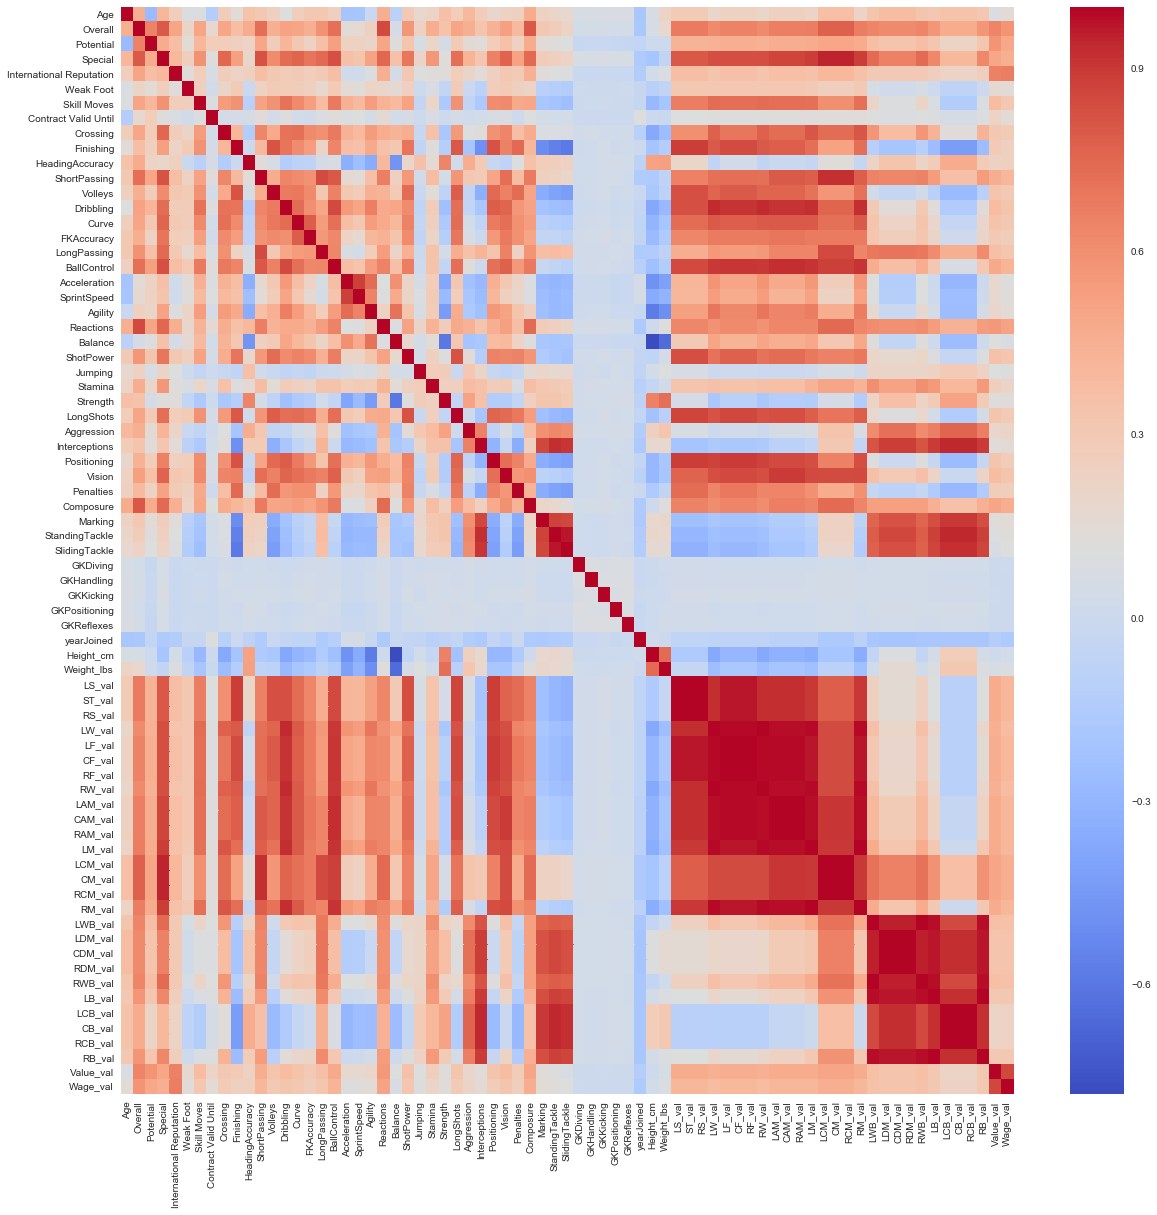

In [481]:
#plt.matshow(data_processing.corr())
#plt.show()
plt.figure(figsize=(20,20))
mySubset = data_processing.iloc[:,40:]
corr = data_processing.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="coolwarm")

In [473]:
goal_corr = corr.sort_values(by=['Value_val'], ascending=False).head(1)

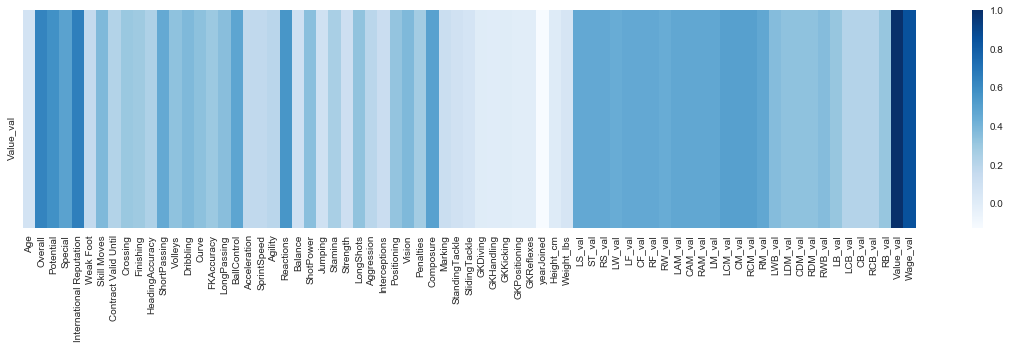

In [479]:
plt.figure(figsize=(20,4))
goal_corr = corr.sort_values(by=['Value_val'], ascending=False).head(1)
sns.heatmap(goal_corr, 
        cmap="Blues")

In [482]:
X = df.drop(['Value_val','Wage_val'],axis=1)
y = df['Value_val']

'Data from 1 to 10'

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Crossing,Finishing
0,31,94,94,2202,5.0,4.0,4.0,2021.0,84.0,95.0
1,33,94,94,2228,5.0,4.0,5.0,2022.0,84.0,94.0
2,26,92,93,2143,5.0,5.0,5.0,2022.0,79.0,87.0
3,27,91,92,2281,4.0,5.0,4.0,2023.0,93.0,82.0
4,27,91,91,2142,4.0,4.0,4.0,2020.0,81.0,84.0


'======================================================================================================'

'Data from 11 to 20'

,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed
0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0
1,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0
2,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0
3,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0
4,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0


'======================================================================================================'

'Data from 21 to 30'

,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions
0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0
1,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0
2,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0
3,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0
4,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0


'======================================================================================================'

'Data from 31 to 40'

,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking
0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0
1,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0
2,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0
3,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0
4,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0


'======================================================================================================'

'Data from 41 to 50'

,GKPositioning,GKReflexes,yearJoined,Height_cm,Weight_lbs,LS_val,ST_val,RS_val,LW_val,LF_val
0,14.0,8.0,2004.0,170.18,159.0,90,90,90,94,95
1,14.0,11.0,2018.0,187.96,183.0,94,94,94,92,93
2,15.0,11.0,2017.0,175.26,150.0,87,87,87,92,92
3,10.0,13.0,2015.0,180.34,154.0,85,85,85,90,90
4,8.0,8.0,2012.0,172.72,163.0,86,86,86,92,91


'======================================================================================================'

'Data from 51 to 60'

,CF_val,RF_val,RW_val,LAM_val,CAM_val,RAM_val,LM_val,LCM_val,CM_val,RCM_val
0,95,95,94,95,95,95,93,86,86,86
1,93,93,92,91,91,91,91,84,84,84
2,92,92,92,92,92,92,91,84,84,84
3,90,90,90,91,91,91,91,90,90,90
4,91,91,92,92,92,92,92,85,85,85


'======================================================================================================'

'Data from 61 to 70'

,RM_val,LWB_val,LDM_val,CDM_val,RDM_val,RWB_val,LB_val,LCB_val,CB_val,RCB_val
0,93,66,63,63,63,66,61,49,49,49
1,91,68,64,64,64,68,64,56,56,56
2,91,68,63,63,63,68,63,50,50,50
3,91,80,80,80,80,80,76,69,69,69
4,92,69,66,66,66,69,63,52,52,52


'======================================================================================================'

'Data from 71 to 80'

,RB_val,Value_val,Wage_val,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua & Barbuda,Nationality_Argentina
0,61,110500000.0,565000.0,0,0,0,0,0,0,1
1,64,77000000.0,405000.0,0,0,0,0,0,0,0
2,63,118500000.0,290000.0,0,0,0,0,0,0,0
3,76,102000000.0,355000.0,0,0,0,0,0,0,0
4,63,93000000.0,340000.0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 81 to 90'

,Nationality_Armenia,Nationality_Australia,Nationality_Austria,Nationality_Azerbaijan,Nationality_Barbados,Nationality_Belarus,Nationality_Belgium,Nationality_Belize,Nationality_Benin,Nationality_Bermuda
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


'======================================================================================================'

'Data from 91 to 100'

,Nationality_Bolivia,Nationality_Bosnia Herzegovina,Nationality_Botswana,Nationality_Brazil,Nationality_Bulgaria,Nationality_Burkina Faso,Nationality_Burundi,Nationality_Cameroon,Nationality_Canada,Nationality_Cape Verde
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 101 to 110'

,Nationality_Central African Rep.,Nationality_Chad,Nationality_Chile,Nationality_China PR,Nationality_Colombia,Nationality_Comoros,Nationality_Congo,Nationality_Costa Rica,Nationality_Croatia,Nationality_Cuba
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 111 to 120'

,Nationality_Curacao,Nationality_Cyprus,Nationality_Czech Republic,Nationality_DR Congo,Nationality_Denmark,Nationality_Dominican Republic,Nationality_Ecuador,Nationality_Egypt,Nationality_El Salvador,Nationality_England
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 121 to 130'

,Nationality_Equatorial Guinea,Nationality_Eritrea,Nationality_Estonia,Nationality_Ethiopia,Nationality_FYR Macedonia,Nationality_Faroe Islands,Nationality_Fiji,Nationality_Finland,Nationality_France,Nationality_Gabon
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 131 to 140'

,Nationality_Gambia,Nationality_Georgia,Nationality_Germany,Nationality_Ghana,Nationality_Greece,Nationality_Grenada,Nationality_Guam,Nationality_Guatemala,Nationality_Guinea,Nationality_Guinea Bissau
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 141 to 150'

,Nationality_Guyana,Nationality_Haiti,Nationality_Honduras,Nationality_Hong Kong,Nationality_Hungary,Nationality_Iceland,Nationality_Indonesia,Nationality_Iran,Nationality_Iraq,Nationality_Israel
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 151 to 160'

,Nationality_Italy,Nationality_Ivory Coast,Nationality_Jamaica,Nationality_Japan,Nationality_Jordan,Nationality_Kazakhstan,Nationality_Kenya,Nationality_Korea DPR,Nationality_Korea Republic,Nationality_Kosovo
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 161 to 170'

,Nationality_Kuwait,Nationality_Latvia,Nationality_Lebanon,Nationality_Liberia,Nationality_Libya,Nationality_Liechtenstein,Nationality_Lithuania,Nationality_Luxembourg,Nationality_Madagascar,Nationality_Mali
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 171 to 180'

,Nationality_Malta,Nationality_Mauritania,Nationality_Mauritius,Nationality_Mexico,Nationality_Moldova,Nationality_Montenegro,Nationality_Montserrat,Nationality_Morocco,Nationality_Mozambique,Nationality_Namibia
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 181 to 190'

,Nationality_Netherlands,Nationality_New Caledonia,Nationality_New Zealand,Nationality_Nicaragua,Nationality_Niger,Nationality_Nigeria,Nationality_Northern Ireland,Nationality_Norway,Nationality_Palestine,Nationality_Panama
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 191 to 200'

,Nationality_Paraguay,Nationality_Peru,Nationality_Philippines,Nationality_Poland,Nationality_Portugal,Nationality_Puerto Rico,Nationality_Qatar,Nationality_Republic of Ireland,Nationality_Romania,Nationality_Russia
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 201 to 210'

,Nationality_Rwanda,Nationality_Saudi Arabia,Nationality_Scotland,Nationality_Senegal,Nationality_Serbia,Nationality_Sierra Leone,Nationality_Slovakia,Nationality_Slovenia,Nationality_South Africa,Nationality_South Sudan
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 211 to 220'

,Nationality_Spain,Nationality_St Kitts Nevis,Nationality_St Lucia,Nationality_Sudan,Nationality_Suriname,Nationality_Sweden,Nationality_Switzerland,Nationality_Syria,Nationality_São Tomé & Príncipe,Nationality_Tanzania
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 221 to 230'

,Nationality_Thailand,Nationality_Togo,Nationality_Trinidad & Tobago,Nationality_Tunisia,Nationality_Turkey,Nationality_Uganda,Nationality_Ukraine,Nationality_United Arab Emirates,Nationality_United States,Nationality_Uruguay
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 231 to 240'

,Nationality_Uzbekistan,Nationality_Venezuela,Nationality_Wales,Nationality_Zambia,Nationality_Zimbabwe,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 241 to 250'

,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,Club_AC Horsens,Club_AD Alcorcón,Club_ADO Den Haag,Club_AEK Athens,Club_AFC Wimbledon,Club_AIK
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 251 to 260'

,Club_AJ Auxerre,Club_AS Béziers,Club_AS Monaco,Club_AS Nancy Lorraine,Club_AS Saint-Étienne,Club_AZ Alkmaar,Club_Aalborg BK,Club_Aarhus GF,Club_Aberdeen,Club_Accrington Stanley
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 261 to 270'

,Club_Adelaide United,Club_Ajax,Club_Akhisar Belediyespor,Club_Al Ahli,Club_Al Batin,Club_Al Faisaly,Club_Al Fateh,Club_Al Fayha,Club_Al Hazem,Club_Al Hilal
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 271 to 280'

,Club_Al Ittihad,Club_Al Nassr,Club_Al Qadisiyah,Club_Al Raed,Club_Al Shabab,Club_Al Taawoun,Club_Al Wehda,Club_Alanyaspor,Club_Albacete BP,Club_Alianza Petrolera
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 281 to 290'

,Club_Amiens SC,Club_América FC (Minas Gerais),Club_América de Cali,Club_Angers SCO,Club_Antalyaspor,Club_Argentinos Juniors,Club_Arka Gdynia,Club_Arsenal,Club_Ascoli,Club_Aston Villa
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 291 to 300'

,Club_Atalanta,Club_Athletic Club de Bilbao,Club_Atiker Konyaspor,Club_Atlanta United,Club_Atlético Bucaramanga,Club_Atlético Huila,Club_Atlético Madrid,Club_Atlético Mineiro,Club_Atlético Nacional,Club_Atlético Paranaense
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 301 to 310'

,Club_Atlético Tucumán,Club_Audax Italiano,Club_BB Erzurumspor,Club_BK Häcken,Club_BSC Young Boys,Club_Bahia,Club_Barnsley,Club_Bayer 04 Leverkusen,Club_Beijing Renhe FC,Club_Beijing Sinobo Guoan FC
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 311 to 320'

,Club_Belgrano de Córdoba,Club_Benevento,Club_Beşiktaş JK,Club_Birmingham City,Club_Blackburn Rovers,Club_Blackpool,Club_Boavista FC,Club_Boca Juniors,Club_Bohemian FC,Club_Bologna
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 321 to 330'

,Club_Bolton Wanderers,Club_Borussia Dortmund,Club_Borussia Mönchengladbach,Club_Botafogo,Club_Bournemouth,Club_Boyacá Chicó FC,Club_Bradford City,Club_Bray Wanderers,Club_Brentford,Club_Brescia
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 331 to 340'

,Club_Brighton & Hove Albion,Club_Brisbane Roar,Club_Bristol City,Club_Bristol Rovers,Club_Brøndby IF,Club_Burnley,Club_Bursaspor,Club_Burton Albion,Club_Bury,Club_CA Osasuna
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 341 to 350'

,Club_CD Antofagasta,Club_CD Aves,Club_CD Everton de Viña del Mar,Club_CD Feirense,Club_CD Huachipato,Club_CD Leganés,Club_CD Lugo,Club_CD Nacional,Club_CD Numancia,Club_CD O'Higgins
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 351 to 360'

,Club_CD Palestino,Club_CD Tenerife,Club_CD Tondela,Club_CD Universidad de Concepción,Club_CF Rayo Majadahonda,Club_CF Reus Deportiu,Club_Cagliari,Club_Cambridge United,Club_Cardiff City,Club_Carlisle United
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 361 to 370'

,Club_Carpi,Club_Ceará Sporting Club,Club_Celtic,Club_Central Coast Mariners,Club_Cerezo Osaka,Club_Chamois Niortais Football Club,Club_Changchun Yatai FC,Club_Chapecoense,Club_Charlton Athletic,Club_Chelsea
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


'======================================================================================================'

'Data from 371 to 380'

,Club_Cheltenham Town,Club_Chicago Fire,Club_Chievo Verona,Club_Chongqing Dangdai Lifan FC SWM Team,Club_Cittadella,Club_Clermont Foot 63,Club_Club América,Club_Club Atlas,Club_Club Atlético Aldosivi,Club_Club Atlético Banfield
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 381 to 390'

,Club_Club Atlético Colón,Club_Club Atlético Huracán,Club_Club Atlético Lanús,Club_Club Atlético Talleres,Club_Club Atlético Tigre,Club_Club Brugge KV,Club_Club Deportes Temuco,Club_Club León,Club_Club Necaxa,Club_Club Tijuana
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 391 to 400'

,Club_Clube Sport Marítimo,Club_Colchester United,Club_Colo-Colo,Club_Colorado Rapids,Club_Columbus Crew SC,Club_Cork City,Club_Cosenza,Club_Coventry City,Club_Cracovia,Club_Crawley Town
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 401 to 410'

,Club_Crewe Alexandra,Club_Crotone,Club_Cruz Azul,Club_Cruzeiro,Club_Crystal Palace,Club_Curicó Unido,Club_Cádiz CF,Club_Córdoba CF,Club_DC United,Club_DSC Arminia Bielefeld
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 411 to 420'

,Club_Daegu FC,Club_Dalian YiFang FC,Club_Dalkurd FF,Club_De Graafschap,Club_Defensa y Justicia,Club_Deportes Iquique,Club_Deportes Tolima,Club_Deportivo Alavés,Club_Deportivo Cali,Club_Deportivo Pasto
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 421 to 430'

,Club_Deportivo Toluca,Club_Deportivo de La Coruña,Club_Derby County,Club_Derry City,Club_Dijon FCO,Club_Dinamo Zagreb,Club_Djurgårdens IF,Club_Doncaster Rovers,Club_Dundalk,Club_Dundee FC
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 431 to 440'

,Club_Dynamo Kyiv,Club_ESTAC Troyes,Club_Eintracht Braunschweig,Club_Eintracht Frankfurt,Club_Elche CF,Club_Empoli,Club_En Avant de Guingamp,Club_Envigado FC,Club_Esbjerg fB,Club_Estudiantes de La Plata
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 441 to 450'

,Club_Ettifaq FC,Club_Everton,Club_Excelsior,Club_Exeter City,Club_Extremadura UD,Club_FC Admira Wacker Mödling,Club_FC Augsburg,Club_FC Barcelona,Club_FC Basel 1893,Club_FC Bayern München
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 451 to 460'

,Club_FC Carl Zeiss Jena,Club_FC Dallas,Club_FC Emmen,Club_FC Energie Cottbus,Club_FC Erzgebirge Aue,Club_FC Girondins de Bordeaux,Club_FC Groningen,Club_FC Hansa Rostock,Club_FC Ingolstadt 04,Club_FC København
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 461 to 470'

,Club_FC Lorient,Club_FC Lugano,Club_FC Luzern,Club_FC Metz,Club_FC Midtjylland,Club_FC Nantes,Club_FC Nordsjælland,Club_FC Porto,Club_FC Red Bull Salzburg,Club_FC Schalke 04
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 471 to 480'

,Club_FC Seoul,Club_FC Sion,Club_FC Sochaux-Montbéliard,Club_FC St. Gallen,Club_FC St. Pauli,Club_FC Thun,Club_FC Tokyo,Club_FC Utrecht,Club_FC Wacker Innsbruck,Club_FC Würzburger Kickers
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 481 to 490'

,Club_FC Zürich,Club_FK Austria Wien,Club_FK Bodø/Glimt,Club_FK Haugesund,Club_FSV Zwickau,Club_Fenerbahçe SK,Club_Feyenoord,Club_Fiorentina,Club_Fleetwood Town,Club_Fluminense
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 491 to 500'

,Club_Foggia,Club_Forest Green Rovers,Club_Fortuna Düsseldorf,Club_Fortuna Sittard,Club_Frosinone,Club_Fulham,Club_GD Chaves,Club_GFC Ajaccio,Club_GIF Sundsvall,Club_Galatasaray SK
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 501 to 510'

,Club_Gamba Osaka,Club_Gangwon FC,Club_Genoa,Club_Getafe CF,Club_Gillingham,Club_Gimnasia y Esgrima La Plata,Club_Gimnàstic de Tarragona,Club_Girona FC,Club_Godoy Cruz,Club_Granada CF
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 511 to 520'

,Club_Grasshopper Club Zürich,Club_Grenoble Foot 38,Club_Grimsby Town,Club_Grêmio,Club_Guadalajara,Club_Guangzhou Evergrande Taobao FC,Club_Guangzhou R&F; FC,Club_Guizhou Hengfeng FC,Club_Gyeongnam FC,Club_Górnik Zabrze
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 521 to 530'

,Club_Göztepe SK,Club_HJK Helsinki,Club_Hallescher FC,Club_Hamburger SV,Club_Hamilton Academical FC,Club_Hammarby IF,Club_Hannover 96,Club_Heart of Midlothian,Club_Hebei China Fortune FC,Club_Hellas Verona
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 531 to 540'

,Club_Henan Jianye FC,Club_Heracles Almelo,Club_Hertha BSC,Club_Hibernian,Club_Hobro IK,Club_Hokkaido Consadole Sapporo,Club_Holstein Kiel,Club_Houston Dynamo,Club_Huddersfield Town,Club_Hull City
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 541 to 550'

,Club_IF Brommapojkarna,Club_IF Elfsborg,Club_IFK Göteborg,Club_IFK Norrköping,Club_IK Sirius,Club_IK Start,Club_Incheon United FC,Club_Independiente,Club_Independiente Medellín,Club_Independiente Santa Fe
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 551 to 560'

,Club_Inter,Club_Internacional,Club_Ipswich Town,Club_Itagüí Leones FC,Club_Jagiellonia Białystok,Club_Jaguares de Córdoba,Club_Jeju United FC,Club_Jeonbuk Hyundai Motors,Club_Jeonnam Dragons,Club_Jiangsu Suning FC
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 561 to 570'

,Club_Junior FC,Club_Juventus,Club_Júbilo Iwata,Club_KAA Gent,Club_KAS Eupen,Club_KFC Uerdingen 05,Club_KRC Genk,Club_KSV Cercle Brugge,Club_KV Kortrijk,Club_KV Oostende
0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 571 to 580'

,Club_Kaizer Chiefs,Club_Kalmar FF,Club_Karlsruher SC,Club_Kashima Antlers,Club_Kashiwa Reysol,Club_Kasimpaşa SK,Club_Kawasaki Frontale,Club_Kayserispor,Club_Kilmarnock,Club_Korona Kielce
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 581 to 590'

,Club_Kristiansund BK,Club_LA Galaxy,Club_LASK Linz,Club_LOSC Lille,Club_La Berrichonne de Châteauroux,Club_La Equidad,Club_Lazio,Club_Le Havre AC,Club_Lecce,Club_Lech Poznań
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 591 to 600'

,Club_Lechia Gdańsk,Club_Leeds United,Club_Legia Warszawa,Club_Leicester City,Club_Levante UD,Club_Lillestrøm SK,Club_Limerick FC,Club_Lincoln City,Club_Liverpool,Club_Livingston FC
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 601 to 610'

,Club_Livorno,Club_Lobos BUAP,Club_Lokomotiv Moscow,Club_Los Angeles FC,Club_Luton Town,Club_MKE Ankaragücü,Club_MSV Duisburg,Club_Macclesfield Town,Club_Malmö FF,Club_Manchester City
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 611 to 620'

,Club_Manchester United,Club_Mansfield Town,Club_Medipol Başakşehir FK,Club_Melbourne City FC,Club_Melbourne Victory,Club_Middlesbrough,Club_Miedź Legnica,Club_Milan,Club_Millonarios FC,Club_Millwall
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 621 to 630'

,Club_Milton Keynes Dons,Club_Minnesota United FC,Club_Molde FK,Club_Monarcas Morelia,Club_Monterrey,Club_Montpellier HSC,Club_Montreal Impact,Club_Morecambe,Club_Moreirense FC,Club_Motherwell
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 631 to 640'

,Club_Málaga CF,Club_NAC Breda,Club_Nagoya Grampus,Club_Napoli,Club_Neuchâtel Xamax,Club_New England Revolution,Club_New York City FC,Club_New York Red Bulls,Club_Newcastle Jets,Club_Newcastle United
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 641 to 650'

,Club_Newell's Old Boys,Club_Newport County,Club_Northampton Town,Club_Norwich City,Club_Nottingham Forest,Club_Notts County,Club_Nîmes Olympique,Club_OGC Nice,Club_Odds BK,Club_Odense Boldklub
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 651 to 660'

,Club_Ohod Club,Club_Oldham Athletic,Club_Olympiacos CFP,Club_Olympique Lyonnais,Club_Olympique de Marseille,Club_Once Caldas,Club_Orlando City SC,Club_Orlando Pirates,Club_Os Belenenses,Club_Oxford United
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 661 to 670'

,Club_PAOK,Club_PEC Zwolle,Club_PFC CSKA Moscow,Club_PSV,Club_Pachuca,Club_Padova,Club_Palermo,Club_Panathinaikos FC,Club_Paraná,Club_Paris FC
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 671 to 680'

,Club_Paris Saint-Germain,Club_Parma,Club_Patriotas Boyacá FC,Club_Patronato,Club_Perth Glory,Club_Perugia,Club_Pescara,Club_Peterborough United,Club_Philadelphia Union,Club_Piast Gliwice
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 681 to 690'

,Club_Plymouth Argyle,Club_Pogoń Szczecin,Club_Pohang Steelers,Club_Port Vale,Club_Portimonense SC,Club_Portland Timbers,Club_Portsmouth,Club_Preston North End,Club_Puebla FC,Club_Queens Park Rangers
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 691 to 700'

,Club_Querétaro,Club_RB Leipzig,Club_RC Celta,Club_RC Strasbourg Alsace,Club_RCD Espanyol,Club_RCD Mallorca,Club_RSC Anderlecht,Club_Racing Club,Club_Racing Club de Lens,Club_Randers FC
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 701 to 710'

,Club_Rangers FC,Club_Ranheim Fotball,Club_Rayo Vallecano,Club_Reading,Club_Real Betis,Club_Real Madrid,Club_Real Oviedo,Club_Real Salt Lake,Club_Real Sociedad,Club_Real Sporting de Gijón
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 711 to 720'

,Club_Real Valladolid CF,Club_Real Zaragoza,Club_Red Star FC,Club_Rio Ave FC,Club_Rionegro Águilas,Club_River Plate,Club_Rochdale,Club_Roma,Club_Rosario Central,Club_Rosenborg BK
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 721 to 730'

,Club_Rotherham United,Club_Royal Antwerp FC,Club_Royal Excel Mouscron,Club_SC Braga,Club_SC Fortuna Köln,Club_SC Freiburg,Club_SC Heerenveen,Club_SC Paderborn 07,Club_SC Preußen Münster,Club_SCR Altach
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 731 to 740'

,Club_SD Eibar,Club_SD Huesca,Club_SG Dynamo Dresden,Club_SG Sonnenhof Großaspach,Club_SK Brann,Club_SK Rapid Wien,Club_SK Slavia Praha,Club_SK Sturm Graz,Club_SKN St. Pölten,Club_SL Benfica
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 741 to 750'

,Club_SPAL,Club_SV Darmstadt 98,Club_SV Mattersburg,Club_SV Meppen,Club_SV Sandhausen,Club_SV Wehen Wiesbaden,Club_SV Werder Bremen,Club_SV Zulte-Waregem,Club_Sagan Tosu,Club_Sampdoria
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 751 to 760'

,Club_San Jose Earthquakes,Club_San Lorenzo de Almagro,Club_San Luis de Quillota,Club_San Martin de Tucumán,Club_San Martín de San Juan,Club_Sandefjord Fotball,Club_Sanfrecce Hiroshima,Club_Sangju Sangmu FC,Club_Santa Clara,Club_Santos
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 761 to 770'

,Club_Santos Laguna,Club_Sarpsborg 08 FF,Club_Sassuolo,Club_Scunthorpe United,Club_Seattle Sounders FC,Club_Sevilla FC,Club_Shakhtar Donetsk,Club_Shamrock Rovers,Club_Shandong Luneng TaiShan FC,Club_Shanghai Greenland Shenhua FC
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 771 to 780'

,Club_Shanghai SIPG FC,Club_Sheffield United,Club_Sheffield Wednesday,Club_Shimizu S-Pulse,Club_Shonan Bellmare,Club_Shrewsbury,Club_Sint-Truidense VV,Club_Sivasspor,Club_Sligo Rovers,Club_Southampton
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 781 to 790'

,Club_Southend United,Club_SpVgg Greuther Fürth,Club_SpVgg Unterhaching,Club_Sparta Praha,Club_Spartak Moscow,Club_Spezia,Club_Sport Club do Recife,Club_Sporting CP,Club_Sporting Kansas City,Club_Sporting Lokeren
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 791 to 800'

,Club_Sporting de Charleroi,Club_St. Johnstone FC,Club_St. Mirren,Club_St. Patrick's Athletic,Club_Stabæk Fotball,Club_Stade Brestois 29,Club_Stade Malherbe Caen,Club_Stade Rennais FC,Club_Stade de Reims,Club_Standard de Liège
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 801 to 810'

,Club_Stevenage,Club_Stoke City,Club_Strømsgodset IF,Club_Sunderland,Club_Suwon Samsung Bluewings,Club_Swansea City,Club_Swindon Town,Club_Sydney FC,Club_SønderjyskE,Club_TSG 1899 Hoffenheim
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 811 to 820'

,Club_TSV 1860 München,Club_TSV Hartberg,Club_Tianjin Quanjian FC,Club_Tianjin TEDA FC,Club_Tiburones Rojos de Veracruz,Club_Tigres U.A.N.L.,Club_Torino,Club_Toronto FC,Club_Tottenham Hotspur,Club_Toulouse Football Club
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 821 to 830'

,Club_Trabzonspor,Club_Tranmere Rovers,Club_Trelleborgs FF,Club_Tromsø IL,Club_U.N.A.M.,Club_UD Almería,Club_UD Las Palmas,Club_US Cremonese,Club_US Orléans Loiret Football,Club_US Salernitana 1919
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 831 to 840'

,Club_Udinese,Club_Ulsan Hyundai FC,Club_Universidad Católica,Club_Universidad de Chile,Club_Unión Española,Club_Unión La Calera,Club_Unión de Santa Fe,Club_Urawa Red Diamonds,Club_V-Varen Nagasaki,Club_VVV-Venlo
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 841 to 850'

,Club_Valencia CF,Club_Valenciennes FC,Club_Vancouver Whitecaps FC,Club_Vegalta Sendai,Club_Vejle Boldklub,Club_Vendsyssel FF,Club_Venezia FC,Club_VfB Stuttgart,Club_VfL Bochum 1848,Club_VfL Osnabrück
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 851 to 860'

,Club_VfL Sportfreunde Lotte,Club_VfL Wolfsburg,Club_VfR Aalen,Club_Viktoria Plzeň,Club_Villarreal CF,Club_Vissel Kobe,Club_Vitesse,Club_Vitória,Club_Vitória Guimarães,Club_Vitória de Setúbal
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 861 to 870'

,Club_Vålerenga Fotball,Club_Vélez Sarsfield,Club_Waasland-Beveren,Club_Walsall,Club_Waterford FC,Club_Watford,Club_Wellington Phoenix,Club_West Bromwich Albion,Club_West Ham United,Club_Western Sydney Wanderers
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 871 to 880'

,Club_Wigan Athletic,Club_Willem II,Club_Wisła Kraków,Club_Wisła Płock,Club_Wolfsberger AC,Club_Wolverhampton Wanderers,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 881 to 890'

,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław,Preferred Foot_Left,Preferred Foot_Right,Work Rate_High/ High,Work Rate_High/ Low
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0


'======================================================================================================'

'Data from 891 to 900'

,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Body Type_Akinfenwa,Body Type_C. Ronaldo,Body Type_Lean
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 901 to 910'

,Body Type_Messi,Body Type_Neymar,Body Type_Normal,Body Type_PLAYER_BODY_TYPE_25,Body Type_Shaqiri,Body Type_Stocky,Position_CAM,Position_CB,Position_CDM,Position_CF
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 911 to 920'

,Position_CM,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


'======================================================================================================'

'Data from 921 to 930'

,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


'======================================================================================================'

'Data from 931 to 932'

,Position_RWB,Position_ST
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


'======================================================================================================'

In [485]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def runRandomForest(X,y,tree_numbers):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    regressor = RandomForestRegressor(n_estimators=tree_numbers, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [486]:
df.columns
X = df.drop(['Value_val'],axis=1)
y = df['Value_val']
runRandomForest(X,y,70)

C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\BaoHau\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


Mean Absolute Error: 144074.70250553128
Mean Squared Error: 625813045552.1052
Root Mean Squared Error: 791083.4630758661


In [490]:
data_processing.select_dtypes(include='object')

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position
0,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,RF
1,Portugal,Juventus,Right,High/ Low,C. Ronaldo,ST
2,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,LW
3,Belgium,Manchester City,Right,High/ High,Normal,RCM
4,Belgium,Chelsea,Right,High/ Medium,Normal,LF
5,Croatia,Real Madrid,Right,High/ High,Lean,RCM
6,Uruguay,FC Barcelona,Right,High/ Medium,Normal,RS
7,Spain,Real Madrid,Right,High/ Medium,Normal,RCB
8,Poland,FC Bayern München,Right,High/ Medium,Normal,ST
9,Germany,Real Madrid,Right,Medium/ Medium,Normal,LCM


In [496]:
my_df = pd.get_dummies(data_processing.drop(['Club'],axis=1))
X1 = df.drop(['Wage_val'],axis=1)
y1 = df['Wage_val']
runRandomForest(X1,y,70)

C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\BaoHau\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\BaoHau\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


Mean Absolute Error: 9597.76953895833
Mean Squared Error: 32407968644.552887
Root Mean Squared Error: 180022.13376291507


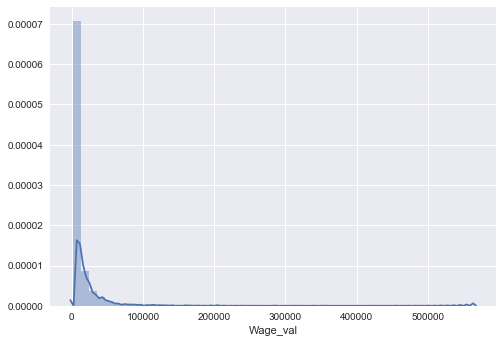

In [498]:
Wage = my_df['Wage_val']
sns.distplot(Wage)

In [499]:
describe(data)

'Data from 1 to 10'

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City


'======================================================================================================'

'Data from 11 to 20'

,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type
0,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi
1,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo
2,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar
3,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean
4,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal


'======================================================================================================'

'Data from 21 to 30'

,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST
0,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2
1,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3
2,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3
3,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN
4,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3


'======================================================================================================'

'Data from 31 to 40'

,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM
0,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2
1,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3
2,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3


'======================================================================================================'

'Data from 41 to 50'

,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB
0,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2
1,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3
2,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3


'======================================================================================================'

'Data from 51 to 60'

,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling
0,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0
1,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0
2,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0
3,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0
4,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0


'======================================================================================================'

'Data from 61 to 70'

,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower
0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0
1,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0
2,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0
3,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0
4,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0


'======================================================================================================'

'Data from 71 to 80'

,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0
1,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0
2,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0
3,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0
4,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0


'======================================================================================================'

'Data from 81 to 90'

,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,monthJoined
0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Jul 1
1,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,Jul 10
2,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Aug 3
3,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,Aug 30
4,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,Jul 1


'======================================================================================================'

'Data from 91 to 91'

,yearJoined
0,2004
1,2018
2,2017
3,2015
4,2012


'======================================================================================================'